<a href="https://colab.research.google.com/github/Sasireka-S/Happy-We-Team/blob/main/Drowsiness-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import os
import cv2

In [3]:
labels = os.listdir("/content/drive/MyDrive/traindf")

In [4]:
print(labels)

['Closed', 'yawn', 'Open', 'no_yawn']


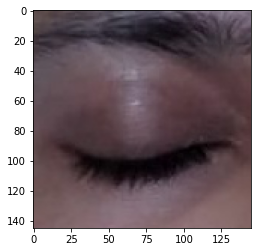

In [5]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/traindf/Closed/_0.jpg"))

In [6]:
def face_for_yawn(direc="/content/drive/MyDrive/traindf", face_cas_path="/content/drive/MyDrive/prediction-image/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


In [ ]:
def get_data(dir_path="/content/drive/MyDrive/traindf", face_cas="/content/drive/MyDrive/prediction-images/haarcascade_frontalface_default.xml", eye_cas="/content/drive/MyDrive/prediction-images/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data
data_train = get_data()

2
3


In [ ]:

def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)
new_data = append_data()

0
1
2
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [22]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [ ]:
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow
import keras

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [17]:
history = model.fit(train_generator, epochs=15, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/30
43/43 [==============================] - 352s 8s/step - loss: 0.3577 - accuracy: 0.8435 - val_loss: 0.2546 - val_accuracy: 0.9033
Epoch 2/30
43/43 [==============================] - 350s 8s/step - loss: 0.3772 - accuracy: 0.8412 - val_loss: 0.2802 - val_accuracy: 0.8722
Epoch 3/30
43/43 [==============================] - 349s 8s/step - loss: 0.2862 - accuracy: 0.8798 - val_loss: 0.2627 - val_accuracy: 0.8981
Epoch 4/30
43/43 [==============================] - 354s 8s/step - loss: 0.2810 - accuracy: 0.8828 - val_loss: 0.2226 - val_accuracy: 0.9275
Epoch 5/30
43/43 [==============================] - 352s 8s/step - loss: 0.2595 - accuracy: 0.8954 - val_loss: 0.2189 - val_accuracy: 0.9257
Epoch 6/30
43/43 [==============================] - 354s 8s/step - loss: 0.2402 - accuracy: 0.9006 - val_loss: 0.1851 - val_accuracy: 0.9378
Epoch 7/30
43/43 [==============================] - 352s 8s/step - loss: 0.2465 - accuracy: 0.9013 - val_loss: 0.1784 - val_accuracy: 0.9292
Epoch 8/30
43

In [19]:
model.save("drowiness_new6.h5")

In [20]:
model.save("drowiness_new6.model")

In [24]:
!pip install tensorflow==2.3.1
!pip install keras==2.4.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.4 MB 23 kB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 459 kB 34.7 MB/s 
     |████████████████████████████████| 2.9 MB 37.6 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0


In [1]:
prediction = model.predict_classes(X_test)
prediction

NameError: ignored

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

In [ ]:
IMG_SIZE = 145
def prepare(filepath, face_cas="/content/drive/MyDrive/prediction-images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new6.h5")

In [ ]:
prediction = model.predict([prepare("/content/drive/MyDrive/traindf/train/no_yawn/1067.jpg")])
np.argmax(prediction)

In [ ]:
prediction = model.predict([prepare("/content/drive/MyDrive/traindf/train/Closed/_101.jpg")])
np.argmax(prediction)